# Machine learning - Multi-layer Perceptron Classifier - Oscar Rotten Tomatoes

In [16]:
import os
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [17]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

## Importando o Dataframe

In [18]:
with open('oscar_rotten.pkl', 'rb') as f:
    df_rotten_tomatoes_oscars=pickle.load(f)

In [19]:
df_rotten_tomatoes_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

### Divisão entre previsores e classe

In [20]:
X_rotten_oscars = df_rotten_tomatoes_oscars.iloc[:, [7,8,10,11,12,13,14]]

In [21]:
Y_rotten_tomatoes_nominee = df_rotten_tomatoes_oscars.iloc[:, 16]

In [22]:
Y_rotten_tomatoes_winner = df_rotten_tomatoes_oscars.iloc[:, 17]

### Escalonamento dos valores

In [23]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

### Tratamento de atributos categóricos

In [24]:
X_rotten_oscars = scaler.fit_transform(X_rotten_oscars)
Y_rotten_tomatoes_nominee = label_encoder.fit_transform(Y_rotten_tomatoes_nominee)
Y_rotten_tomatoes_winner = label_encoder.fit_transform(Y_rotten_tomatoes_winner)

### Multi-layer Perceptron Classifier Nominee

### Tuning dos parâmetros com GridSearch

In [20]:
parametros = {'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'max_iter': [1000, 1500, 2000],
              'hidden_layer_sizes': [(5,2), (10, 4)]}
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_rotten_oscars, Y_rotten_tomatoes_nominee)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'hidden_layer_sizes': (10, 4), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'lbfgs'}
0.8739767868051315


#### Divisão Treinamento e Teste

In [10]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_nominee_treinamento, Y_rotten_oscars_nominee_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_nominee,test_size = 0.25, random_state = 0)

#### Previsões

In [11]:
MLPC_nominee = MLPClassifier(hidden_layer_sizes=(10, 4), learning_rate='adaptive', max_iter=1000, solver='lbfgs')
MLPC_nominee.fit(X_rotten_oscars_treinamento,Y_rotten_oscars_nominee_treinamento);
previsoes_rotten_nominee = MLPC_nominee.predict(X_rotten_oscars_teste)

#### Acurácia

In [12]:
accuracy_score(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

0.8697776691913022

#### Matriz de Confusão 

In [13]:
confusion_matrix(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

array([[3440,   79],
       [ 454,  120]])

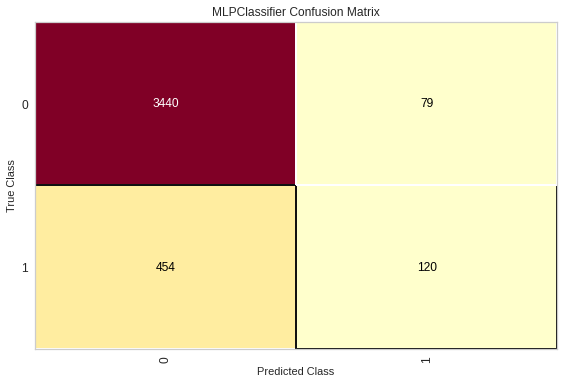

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
cm_nominee = ConfusionMatrix(MLPC_nominee)
cm_nominee.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_nominee_treinamento)
cm_nominee.score(X_rotten_oscars_teste, Y_rotten_oscars_nominee_teste)
cm_nominee.show()

#### Claissification Report

In [15]:
print(classification_report(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3519
           1       0.60      0.21      0.31       574

    accuracy                           0.87      4093
   macro avg       0.74      0.59      0.62      4093
weighted avg       0.84      0.87      0.84      4093



### Multi-layer Perceptron Classifier Winner

### Tuning dos parâmetros com GridSearch

In [11]:
parametros = {'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'max_iter': [1000, 1500, 2000],
              'hidden_layer_sizes': [(5,2), (10, 4)]}
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_rotten_oscars, Y_rotten_tomatoes_winner)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'hidden_layer_sizes': (5, 2), 'learning_rate': 'invscaling', 'max_iter': 2000, 'solver': 'adam'}
0.9501527183872938


#### Divisão Treinamento e Teste

In [25]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_winner_treinamento, Y_rotten_oscars_winner_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_winner,test_size = 0.25, random_state = 0)

#### Previsões

In [26]:
MLPC_winner = MLPClassifier(hidden_layer_sizes=(5, 2), learning_rate='invscaling', max_iter=2000, solver='adam')
MLPC_winner.fit(X_rotten_oscars_treinamento,Y_rotten_oscars_winner_treinamento);
previsoes_rotten_winner = MLPC_winner.predict(X_rotten_oscars_teste)

#### Acurácia

In [27]:
accuracy_score(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

0.9477156120205228

#### Matriz de Confusão 

In [28]:
confusion_matrix(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

array([[3878,    1],
       [ 213,    1]])

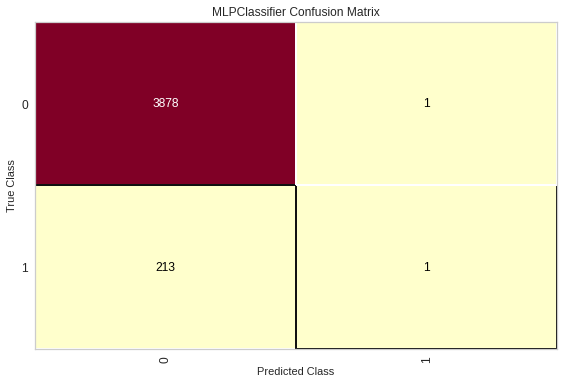

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
cm_winner = ConfusionMatrix(MLPC_winner)
cm_winner.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_winner_treinamento)
cm_winner.score(X_rotten_oscars_teste, Y_rotten_oscars_winner_teste)
cm_winner.show()

#### Claissification Report

In [30]:
print(classification_report(Y_rotten_oscars_winner_teste, previsoes_rotten_winner))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3879
           1       0.50      0.00      0.01       214

    accuracy                           0.95      4093
   macro avg       0.72      0.50      0.49      4093
weighted avg       0.92      0.95      0.92      4093

